Model Implementetion
===

No model is practical if it can't be used outside the training and test sets. This is when the
model is deployed into production.

In this stage, we normally load all the model's operation and trained weights, wait for new
unknown data, and when it arrives, we feed it through all the chained functions of the
model, informing the outcomes of the output layer or operation via a web service, printing
to standard output, and so on.

Model Error Metrics
---
---

Mean Absolute Error
---
---

##### Mean Absolute Error or MAE is used to obtain the absolute error lost.

##### It is not recommended to be used in the case of big outliers


##### The formula goes as:

For each value (yi)

Subtract yi(the actual value) by ŷi(the predicted value)

Sum all the results

Divide the sum of the results by the number of samples

$$ MAE(y, ŷi) = \frac{1}{n_{samples}} \sum_{i=1}^{n} |y_i - ŷ_i| $$
---

### Diving in the code

In [42]:
# sum_values, where every subtraction will be appended for later sum
sum_values = []
def mae(actual_values, predicted_values):
    for actual_value, predicted_value in zip(actual_values, predicted_values):
        # Appending the subtraction of the actual value by the predicted value
        sum_values.append(actual_value - predicted_value)
    
    print(sum_values)
    # Sum all the subtracted values
    result = sum(sum_values)
    # Divide the sum of the subtracted values by the number of samples
    return result/len(actual_values)



### Testing it

In [43]:
actual = [10, 4, 6]
predicted = [10, 2, 3]

print(mae(actual, predicted))

[0, 2, 3]
1.6666666666666667


Median Absolute Error
---
---

##### The median absolute error is particularly interesting because it is robust to outliers. The loss  
##### is calculated by taking the median of all absolute differences between the target and the  
##### prediction.
##### If ŷ is the predicted value of the ith sample and yi is the corresponding true value, then the  
##### median absolute error estimated over n samples is defined as follows:

$$ MedAE(y, ŷ) = median(|y_1 - ŷ_1|,...,|y_n - ŷ_n|) $$
---

### Diving in the code


In [44]:
# median_values, where every subtraction will be appended for later median calculation
median_values = []
def median_error(actual_values, predicted_values):
    for actual_value, predicted_value in zip(actual_values, predicted_values):
        # Appending the subtraction of the actual value by the predicted value
        median_values.append(actual_value - predicted_value)
    
    print(median_values)
    # Find the median in the array median_values
    result = np.median(median_values)
    return result



### Testing it

In [45]:
print(median_error(actual, predicted))

[0, 2, 3]
2.0


Mean squared error
---
---

##### The mean squared error (MSE) is a risk metric equal to the expected value of the squared (quadratic) error loss.  
##### If ŷi is the predicted value of the ith sample and yi is the corresponding true value, then the  
##### MSE estimated over n samples is defined as follows:


$$ MSE(y, ŷ) = \frac{1}{n_{samples}} \sum_{i=1}^{n} (y_i - ŷ_i)^2 $$
---

### Diving in the code

In [46]:
sum_values = []
def mse(actual_values, predicted_values):
    for actual_value, predicted_value in zip(actual_values, predicted_values):
        # Appending the subtraction of the actual value by the predicted value
        sum_values.append((actual_value - predicted_value)**2)
    
    print(sum_values)
    # Sum all the subtracted values
    result = sum(sum_values)
    # Divide the sum of the subtracted values by the number of samples
    return result/len(actual_values)


### Testing it

In [47]:
print(mse(actual, predicted))

[0, 4, 9]
4.333333333333333


Root mean squared error (RMSE)
---
---

##### RMSE is a quadratic scoring rule that also measures the average magnitude of the error.  
##### It’s the square root of the average of squared differences between prediction and actual observation.

$$ RMSE(y, ŷ) = \sqrt {\frac{1}{n_{samples}} \sum_{i=1}^{n} (y_i - ŷ_i)^2} $$
---

### Diving in the code

In [41]:
sum_values = []

def rmse(actual_values, predicted_values):
    for actual_value, predicted_value in zip(actual_values, predicted_values):
        # Appending the subtraction of the actual value by the predicted value
        sum_values.append((actual_value - predicted_value)**2)
    
    print(sum_values)
    # Sum all the subtracted values
    result = sum(sum_values)
    # Divide the sum of the subtracted values by the number of samples
    result = result/len(actual_values)
    result = np.sqrt(result)
    return result

print(rmse(actual, predicted))

[0, 4, 9]
2.0816659994661326


Confusion Matrix
---

[[0 0 0 1 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 1]
 [0 0 0 0 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 0]]


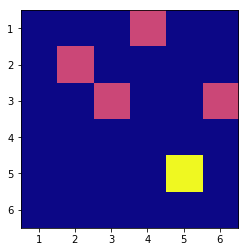

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
y_true = [6,6,9,4,5,3]
y_pred = [6,6,4,4,2,3]
y = confusion_matrix(y_pred, y_true)
print(y)
plt.imshow(confusion_matrix(y_pred, y_true), interpolation='nearest',
cmap='plasma')
plt.xticks(np.arange(0,6), np.arange(1,9))
plt.yticks(np.arange(0,6), np.arange(1,9))
plt.show()